# WeatherPy

## Analysis

In [16]:
import pandas as pd
import json
import requests as rq
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from citipy import citipy
from pprint import pprint
import time

In [19]:
city_info = citipy.nearest_city(22.99, 120.21)

att = dir(city_info)
print(att)
city = city_info.city_name
print(city)
country = city_info.country_code
print(country)


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'city_name', 'country_code']
tainan
tw


## Generate Cities List

In [20]:
weather_df = pd.DataFrame(columns= ['City','Country'])
for i in range(50):
    lat = np.random.uniform(low= -90, high=90)
    long = np.random.uniform(low=-180, high=180)
    city_info = citipy.nearest_city(lat, long)
    city = city_info.city_name
    country = city_info.country_code
    weather_df = weather_df.append({'City':city, 'Country':country}, ignore_index=True)
    
weather_df.head()

,City,Country
0,talnakh,ru
1,albany,au
2,mar del plata,ar
3,ostrovnoy,ru
4,yatou,cn


## Perform API Calls

In [21]:
weather_df["Temperature (F)"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,talnakh,ru,,,,,,
1,albany,au,,,,,,
2,mar del plata,ar,,,,,,
3,ostrovnoy,ru,,,,,,
4,yatou,cn,,,,,,


In [22]:
url = 'http://api.openweathermap.org/data/2.5/weather'

print("Beginning Data Retrieval")
city_count = 0

for index, row in weather_df.iterrows():
    target_city = row["City"]
    city = target_city.replace(" ","")
    params = {'q':city, 'APPID':'23c333dd9ad6b00441baded0602a84c7', 'units':'IMPERIAL'}
    city_data = rq.get(url, params=params).json()
    
    if city_data["cod"] == "404":
        continue
    else:  
        print("------------------------")
        print("Proceesing Record : " , city_count+1, ' of Set 1' ' | ' , city_data["name"])
        print(url+"?"+"&APPID=23c333dd9ad6b00441baded0602a84c7"+"&units=IMPERIAL"+"&q="+city)
        weather_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        weather_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        weather_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        weather_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        weather_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        weather_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        city_count += 1
        if city_count == 500:
            break
            
print(f"Complete Data Retrieval of {city_count} cities")

Beginning Data Retrieval
------------------------
Proceesing Record :  1  of Set 1 |  Talnakh
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=talnakh
------------------------
Proceesing Record :  2  of Set 1 |  Albany
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=albany
------------------------
Proceesing Record :  3  of Set 1 |  Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ostrovnoy
------------------------
Proceesing Record :  4  of Set 1 |  Yatou
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=yatou
------------------------
Proceesing Record :  5  of Set 1 |  Portonovo
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=portonovo
------------------------
Proceesing Record :  6  of Set 1 |  Hermanu

In [25]:
weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,talnakh,ru,6.63,69.49,88.39,77.0,64.0,6.44
1,albany,au,41.99,42.65,-73.75,87.0,90.0,3.36
2,mar del plata,ar,NaN,NaN,NaN,NaN,NaN,NaN
3,ostrovnoy,ru,29.40,68.05,39.51,93.0,92.0,11.14
4,yatou,cn,82.40,3.63,9.81,88.0,20.0,1.12


In [16]:
# Export the City_Data into a csv
weather_df.to_csv('weather_data_file.csv', index_label="City_ID")

In [26]:
weather_df.replace('',np.nan, inplace=True)

clean_weather_df = weather_df.dropna(how='any')

lats = list(clean_weather_df["Latitude"])
temps = list(clean_weather_df["Temperature (F)"])
hums = list(clean_weather_df["Humidity (%)"])
clouds = list(clean_weather_df["Cloudiness (%)"])
speeds = list(clean_weather_df["Wind Speed (mph)"])

clean_weather_df = clean_weather_df.reset_index()
del clean_weather_df['index']
clean_weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,talnakh,ru,6.63,69.49,88.39,77.0,64.0,6.44
1,albany,au,41.99,42.65,-73.75,87.0,90.0,3.36
2,ostrovnoy,ru,29.40,68.05,39.51,93.0,92.0,11.14
3,yatou,cn,82.40,3.63,9.81,88.0,20.0,1.12
4,porto novo,cv,61.68,44.53,11.75,72.0,0.0,5.82


## Latitude vs Temperature Plot

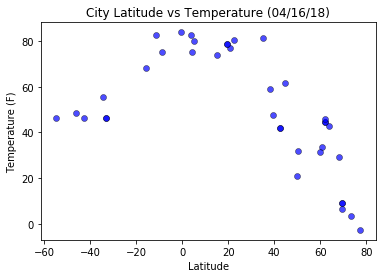

In [45]:
# Build scatter plot for latitude vs temperature

plt.scatter(lats, temps, edgecolor="black", linewidths=0.5, color='b', marker="o", 
alpha=0.7,  label="Cities")
plt.rc('axes', axisbelow=True)
# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
# plt.grid(color = 'w', linewidth = 1)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Latitude vs Humidity Plot

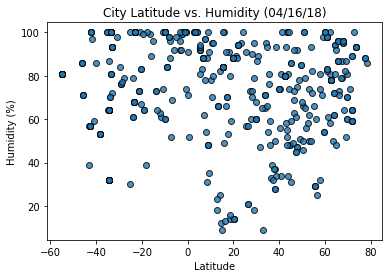

In [22]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            hums,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Latitude vs Cloudness Plot

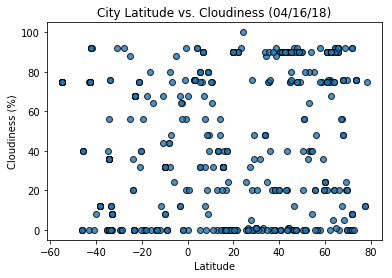

In [23]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            clouds,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Latitude vs Wind Speed Plot

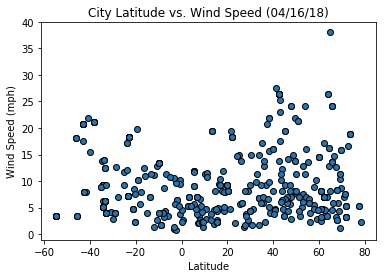

In [24]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            speeds,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()